# Explore here

In [33]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

#Recopilacion de Datos

In [4]:
data = pd.read_csv("/workspaces/Maria-Carlucci-EDA/data/raw/AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#Exploracion y Limpieza de datos

In [6]:
data.shape

(48895, 16)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Hay un total de 48895 casas con 16 columnas variables entre la que debemos predecir que es el precio
Hay 5 variables categoricas y 10 numericas y 1 de Fechas
Hay columnas con valores nulos como name, host_name, last_review y reviews_per_month
Ahora eliminamos informacion que a mi parecer es irrelevante y ademas tiene valores nulos


In [9]:
data_c = data.copy()
data_c.drop(["id","name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
data_c.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


#Analisis de las variables

In [10]:
data_c["neighbourhood_group"].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [11]:
data_c["neighbourhood"].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [12]:
data_c["room_type"].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [13]:
data_c["availability_365"].value_counts()

availability_365
0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: count, Length: 366, dtype: int64

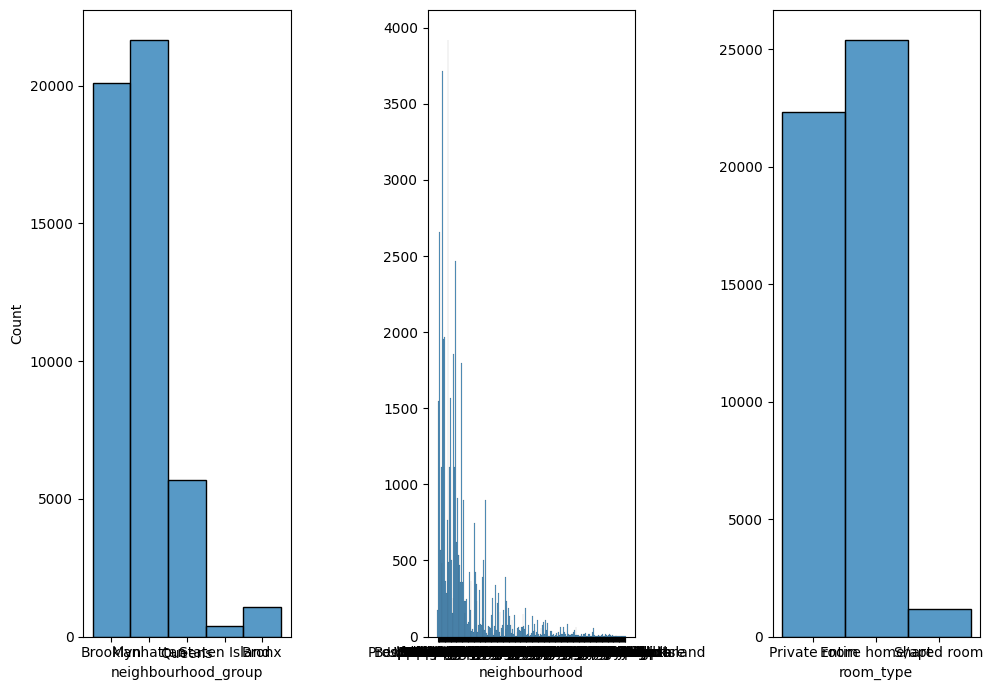

In [14]:
fig, axis = plt.subplots(1, 3, figsize = (10, 7))

sns.histplot(ax = axis[0], data = data_c, x = "neighbourhood_group")
sns.histplot(ax = axis[1], data = data_c, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[2], data = data_c, x = "room_type").set(ylabel = None)

plt.tight_layout()
plt.show()

#Hay basicamente 5 grupos de vecindarios que son Manhattan, Broklyn, Queens, Bronx y State Island. Los mas demandados son Manhattan y Broklyn
Hay tres tipos de alquileres: Entire home/apt, Private room y Shared room
Los mas buscados son Entire home y Private room 

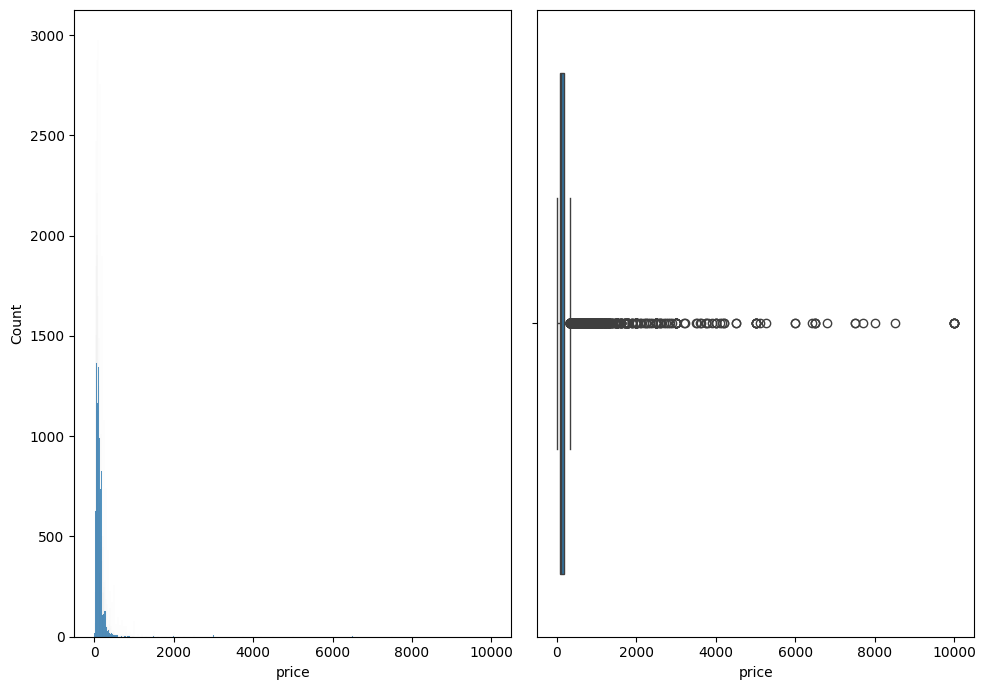

In [15]:
fig, axis = plt.subplots(1, 2, figsize = (10, 7))

sns.histplot(ax = axis[0], data = data_c, x = "price")
sns.boxplot(ax = axis[1], data = data_c, x = "price")

plt.tight_layout()
plt.show()

#Los precios tienen una distribucion totalmente sesgada por la izquierda y tiene muchos valores atipicos

In [16]:
data_c['neighbourhood_group'] = data_c['neighbourhood_group'].map({'Manhattan':0, 'Brooklyn':1, 'Queens':2, 'Bronx':3, 'Staten Island': 4})

In [17]:
data_c["neighbourhood_group"].value_counts()

neighbourhood_group
0    21661
1    20104
2     5666
3     1091
4      373
Name: count, dtype: int64

In [18]:
data_c['room_type'] = data_c['room_type'].map({'Entire home/apt':0, 'Private room':1, 'Shared room':2})

In [19]:
data_c["room_type"].value_counts()

room_type
0    25409
1    22326
2     1160
Name: count, dtype: int64

<Axes: >

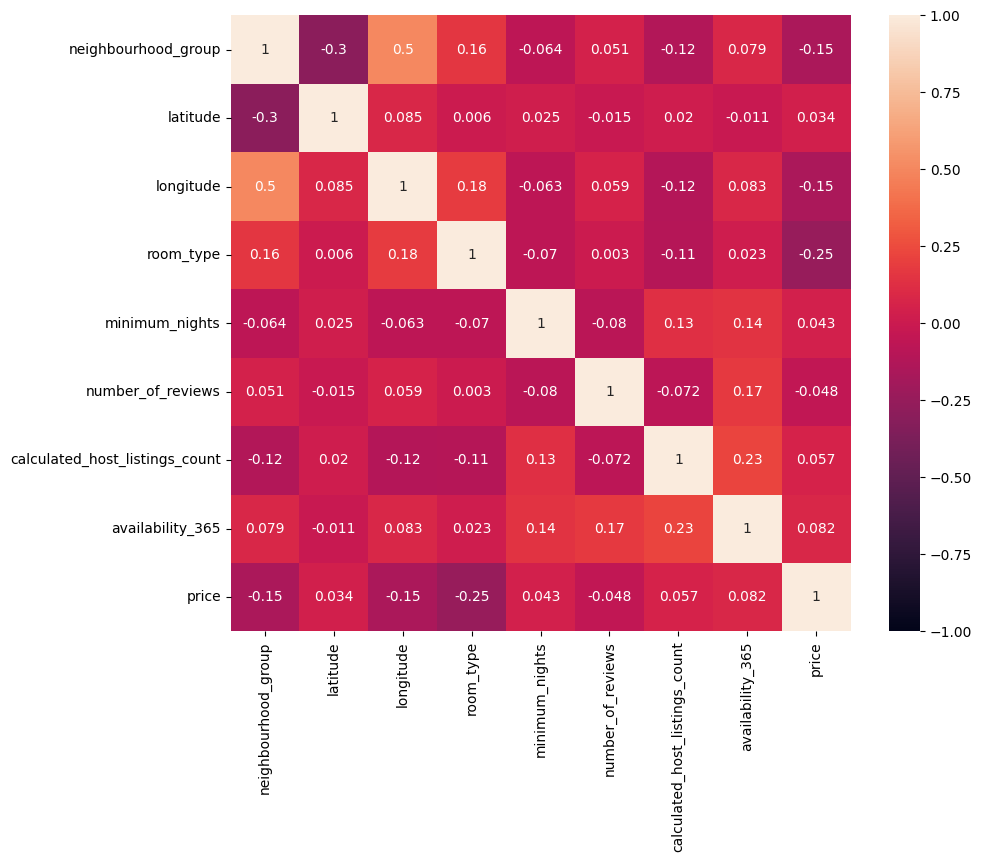

In [20]:
columnas_numericas = [
    'neighbourhood_group', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 
    'calculated_host_listings_count', 'availability_365', 'price'
] 

plt.figure(figsize=(10, 8))
sns.heatmap(data_c[columnas_numericas].corr().round(3), vmax=1, vmin=-1, annot=True)


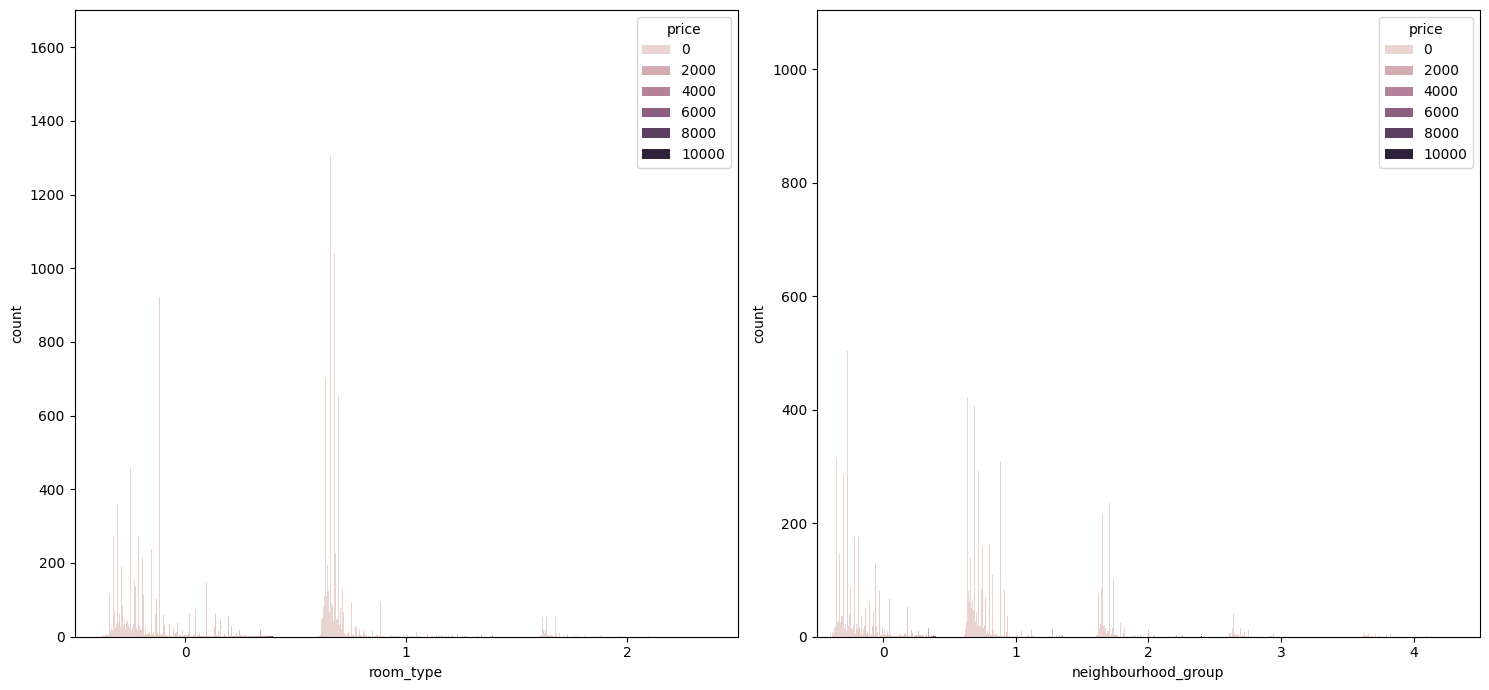

In [21]:
fig, axis = plt.subplots(1, 2, figsize = (15, 7))

sns.countplot(ax = axis[0], data = data_c, x = "room_type", hue = "price")
sns.countplot(ax = axis[1], data = data_c, x = "neighbourhood_group", hue = "price")

plt.tight_layout()
plt.show()

#Pareciera que hay una fuerte relacion entre el precio y el room_type y luego entre el precio y el neighbourhood_group
EL resto de las variables no me parecen tan significativas

In [22]:
data_c.describe()

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.740382,40.728949,-73.952170,0.504060,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.805862,0.054530,0.046157,0.545379,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,40.723070,-73.955680,0.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [23]:
data_c["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [28]:
data_c[(data_c["price"]==0) | (data_c["price"]==10000)]["price"].value_counts()

price
0        11
10000     3
Name: count, dtype: int64

In [29]:
 data_c.drop(data_c[data_c["price"]==0].index, inplace=True)

In [30]:
data_c[(data_c["price"]==0) | (data_c["price"]==10000)]["price"].value_counts()

price
10000    3
Name: count, dtype: int64

In [31]:
data_c['price'].describe()

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [38]:
# Dividimos el conjunto de datos en muestras de train y test
X = data_c[['neighbourhood_group', 'room_type']]
y = data_c["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,neighbourhood_group,room_type
44559,2,0
31363,1,1
42274,3,1
11756,0,1
23350,1,1


In [39]:
X_train["price"] = list(y_train)
X_test["price"] = list(y_test)
X_train.to_csv("../data/processed/clean_train.csv", index = False)
X_test.to_csv("../data/processed/clean_test.csv", index = False)